In [0]:
# Import Library
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
# Download data
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt

--2020-04-20 09:12:35--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 2404:6800:4008:c05::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-04-20 09:12:35 (66.8 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [0]:
# Read Data
data = open('/tmp/sonnets.txt').read()

# Create Corpus
corpus = data.lower().split("\n")

In [0]:
# Initialize Tokenizer
tokenizer = Tokenizer()

# Process Tokenizer
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)
  
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [5]:
# Model
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
______________________________________________

In [6]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 13s 26ms/step - loss: 6.9128 - accuracy: 0.0228
Epoch 2/100
484/484 [==============================] - 12s 26ms/step - loss: 6.5044 - accuracy: 0.0248
Epoch 3/100
484/484 [==============================] - 12s 26ms/step - loss: 6.3878 - accuracy: 0.0269
Epoch 4/100
484/484 [==============================] - 13s 26ms/step - loss: 6.2829 - accuracy: 0.0307
Epoch 5/100
484/484 [==============================] - 13s 26ms/step - loss: 6.1907 - accuracy: 0.0363
Epoch 6/100
484/484 [==============================] - 13s 26ms/step - loss: 6.0989 - accuracy: 0.0404
Epoch 7/100
484/484 [==============================] - 12s 26ms/step - loss: 6.0047 - accuracy: 0.0412
Epoch 8/100
484/484 [==============================] - 12s 26ms/step - loss: 5.9224 - accuracy: 0.0440
Epoch 9/100
484/484 [==============================] - 12s 26ms/step - loss: 5.8329 - accuracy: 0.0486
Epoch 10/100
484/484 [==============================] - 12s 26ms/step - l

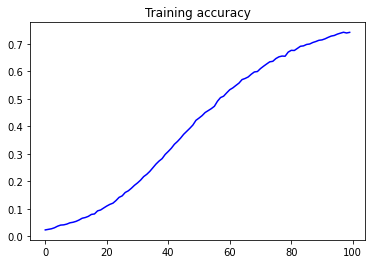

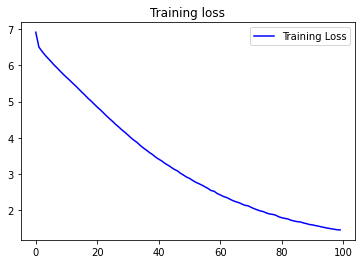

In [7]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [8]:
seed_text = "Love"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Love is my sin and thy dear virtue hate well near life held well lie of thee truth 'will ' die so 'will of show me so thine eyes not thee and me thought they find me gladly alone ' now see me old so level so thine eye eyes not after thee die with thee ' shows not done hell well well night now born well thinks am seen keep more eyes so 'will ' grow made from first me strife bring thee back cannot bring better shine so 'will ' still 'will ' doth see show thee thy fair
